In [13]:
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import Planck15, Planck18
import astropy.units as u

import sys
sys.path.insert(0,'../code')
import utils
import maps

In [2]:
area_allsky = 41252.96125*(u.deg**2) #deg^2
def volume_Gpcperh(cosmo, z_min, z_max, area):
    v_inner = cosmo.comoving_volume(z_min)
    v_outer = cosmo.comoving_volume(z_max)
    v_shell = v_outer - v_inner
    v_shell_Gpc = v_shell.to(u.Gpc**3)
    v_shell_Gpcperh = v_shell_Gpc * cosmo.h**3

    frac_sky = area / area_allsky
    v_Gpc = frac_sky * v_shell_Gpc
    v_Gpcperh = v_Gpc * cosmo.h**3

    print(f"Volume in shell between {z_min} < z < {z_max}: {v_shell_Gpc:.3f} = {v_shell_Gpcperh.value:.3f} (Gpc/h)^3")
    print(f"Sky area is {area:.3f} which is {frac_sky:.3f} of the sky")
    print(f"Volume is then {v_Gpc:.3f} = {v_Gpcperh.value:.3f} (Gpc/h)^3")
    return v_Gpcperh.value

In [3]:
# eBOSS DR16
# https://academic.oup.com/mnras/article/514/3/3396/6566355?login=true
vol_eboss = volume_Gpcperh(Planck15, 0.8, 2.2, 4808*(u.deg**2))

Volume in shell between 0.8 < z < 2.2: 634.085 Gpc3 = 197.098 (Gpc/h)^3
Sky area is 4808.000 deg2 which is 0.117 of the sky
Volume is then 73.902 Gpc3 = 22.972 (Gpc/h)^3


In [4]:
# Gaia, Av < 0.2
NSIDE = 64
Av_max = 0.2
fn_dustmap = f'../data/maps/map_dust_NSIDE{NSIDE}.npy'
map_dust = maps.get_dust_map(NSIDE=NSIDE, R=3.1, fn_map=fn_dustmap)
area_per_pixel = hp.nside2pixarea(NSIDE, degrees=True) * (u.deg**2)
n_below_Avmax = np.sum(map_dust < Av_max)
area_gaia_Av02 = area_per_pixel*n_below_Avmax

Dustmap already exists, loading from ../data/maps/map_dust_NSIDE64.npy


In [5]:
volume_Gpcperh(Planck15, 0.1, 4, area_gaia_Av02)

Volume in shell between 0.1 < z < 4: 1655.705 Gpc3 = 514.658 (Gpc/h)^3
Sky area is 19541.274 deg2 which is 0.474 of the sky
Volume is then 784.297 Gpc3 = 243.790 (Gpc/h)^3


243.79020144071328

In [6]:
# Gaia, Av < 0.5
Av_max = 0.5

n_below_Avmax = np.sum(map_dust < Av_max)
area_gaia_Av05 = area_per_pixel*n_below_Avmax

In [7]:
volume_Gpcperh(Planck15, 0.1, 4, area_gaia_Av05)

Volume in shell between 0.1 < z < 4: 1655.705 Gpc3 = 514.658 (Gpc/h)^3
Sky area is 29154.543 deg2 which is 0.707 of the sky
Volume is then 1170.130 Gpc3 = 363.722 (Gpc/h)^3


363.72203871692034

In [8]:
z_maxs = np.arange(0, 6, 0.1)
vs = []
for z_max in z_maxs:
    vs.append( volume_Gpcperh(Planck15, 0.0, z_max, area_allsky) )

Volume in shell between 0.0 < z < 0.0: 0.000 Gpc3 = 0.000 (Gpc/h)^3
Sky area is 41252.961 deg2 which is 1.000 of the sky
Volume is then 0.000 Gpc3 = 0.000 (Gpc/h)^3
Volume in shell between 0.0 < z < 0.1: 0.338 Gpc3 = 0.105 (Gpc/h)^3
Sky area is 41252.961 deg2 which is 1.000 of the sky
Volume is then 0.338 Gpc3 = 0.105 (Gpc/h)^3
Volume in shell between 0.0 < z < 0.2: 2.508 Gpc3 = 0.780 (Gpc/h)^3
Sky area is 41252.961 deg2 which is 1.000 of the sky
Volume is then 2.508 Gpc3 = 0.780 (Gpc/h)^3
Volume in shell between 0.0 < z < 0.30000000000000004: 7.830 Gpc3 = 2.434 (Gpc/h)^3
Sky area is 41252.961 deg2 which is 1.000 of the sky
Volume is then 7.830 Gpc3 = 2.434 (Gpc/h)^3
Volume in shell between 0.0 < z < 0.4: 17.132 Gpc3 = 5.325 (Gpc/h)^3
Sky area is 41252.961 deg2 which is 1.000 of the sky
Volume is then 17.132 Gpc3 = 5.325 (Gpc/h)^3
Volume in shell between 0.0 < z < 0.5: 30.848 Gpc3 = 9.589 (Gpc/h)^3
Sky area is 41252.961 deg2 which is 1.000 of the sky
Volume is then 30.848 Gpc3 = 9.589 

(0.0, 807.962558769022)

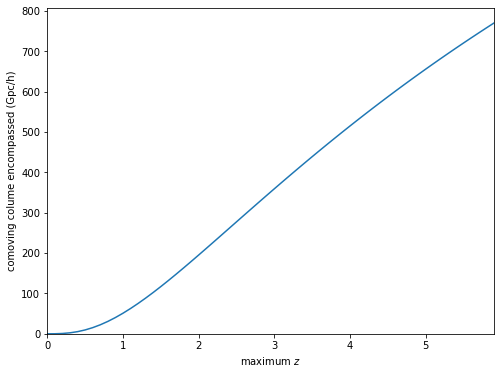

In [9]:
plt.figure(figsize=(8,6))
plt.plot(z_maxs, vs)
plt.xlabel("maximum $z$")
plt.ylabel("comoving colume encompassed (Gpc/h)")
plt.xlim(0, np.max(z_maxs))
plt.ylim(0)

(0.0, 5.968892283937209)

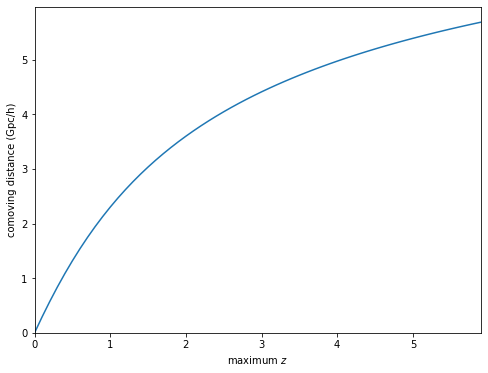

In [10]:
z_maxs = np.arange(0, 6, 0.1)
Rs = []
for z_max in z_maxs:
    Rs.append( Planck15.comoving_distance(z_max).to(u.Gpc)*Planck15.h )

Rs_val = [R.value for R in Rs]
plt.figure(figsize=(8,6))
plt.plot(z_maxs, Rs_val)
plt.xlabel("maximum $z$")
plt.ylabel("comoving distance (Gpc/h)")
plt.xlim(0, np.max(z_maxs))
plt.ylim(0)

In [11]:
def ndens_of_z(z_arr, z_bins, cosmo):
    
    v_at_z_bins = np.empty(len(z_bins), dtype=u.Quantity)
    for i in range(len(z_bins)):
        v = cosmo.comoving_volume(z_bins[i])
        v_at_z_bins[i] = v.to(u.Gpc**3)
    v_shells = v_at_z_bins[1:] - v_at_z_bins[:-1] 
    
    ndens = []
    for i in range(len(z_bins)-1):
        N_inbin = np.sum((z_arr >= z_bins[i]) & (z_arr < z_bins[i+1]))
        ndens_inbin = N_inbin/v_shells[i]
        ndens.append(ndens_inbin)
    return ndens

In [1]:
# eqn 5 of https://arxiv.org/pdf/1712.08064.pdf
def volume_effective_Gpcperh(z_arr, z_bins, z_min, z_max, cosmo, area, P0):
    
    area_rad = area.to(u.rad**2)
    ndens_at_z_bins = ndens_of_z(z_arr, z_bins, cosmo)
    
    v_at_z_bins = np.empty(len(z_bins), dtype=u.Quantity)
    R_at_z_bins = np.empty(len(z_bins), dtype=u.Quantity)
    for i in range(len(z_bins)):
        v = cosmo.comoving_volume(z_bins[i])
        v_at_z_bins[i] = v.to(u.Gpc**3)
        R_at_z_bins[i] = cosmo.comoving_distance(z_bins[i]).to(u.Gpc)
    v_shells = v_at_z_bins[1:] - v_at_z_bins[:-1] 
    
    # discrete integral, just summing
    def integrand(ndens, R, dRdz, dz):
        return (ndens * P0 /(1 + ndens * P0))**2 * area_rad.value * R**2 * dRdz  
        #return area_rad.value * R**2 * dRdz * dz

    integral = 0
    for i in range(len(z_bins)-1):
        z_avg = 0.5*(z_bins[i] + z_bins[i+1])
        
        R = cosmo.comoving_distance(z_avg).to(u.Gpc)
        dR = R_at_z_bins[i+1] - R_at_z_bins[i]
        dz = z_bins[i+1] - z_bins[i]
        dRdz = dR/dz
        print(z_bins[i], z_bins[i+1], z_avg)
        print(R)
        print(ndens_at_z_bins[i].to(1/u.Mpc**3)/cosmo.h**3)
        print(dR, dz, dRdz)
        print()
        integral += integrand(ndens_at_z_bins[i], R, dRdz, dz)

    v_Gpc = integral.to(u.Gpc**3)
    v_Gpcperh = v_Gpc * cosmo.h**3
    print(f"Sky area is {area:.3f} which is {area/area_allsky:.3f} of the sky")
    print(f"Effective volume is {v_Gpc:.3f} = {v_Gpcperh.value:.3f} (Gpc/h)^3")
    return v_Gpcperh.value

In [2]:
G_max = 20.4
fn_gaia = f'../data/gaia_G{G_max}.fits'
tab_gaia = utils.load_table(fn_gaia)

NameError: name 'utils' is not defined

4.564


Text(0, 0.5, '$dN/dz$')

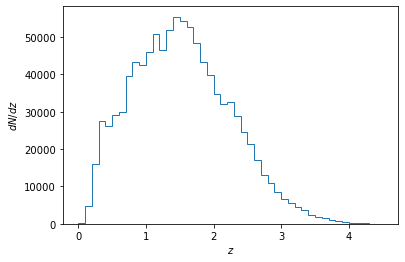

In [15]:
z_spz = tab_gaia['redshift_spz']
print(np.max(z_spz))
z_bins = np.arange(0, 4.6, 0.1)
plt.hist(z_spz, bins=z_bins, histtype='step')
plt.xlabel(r'$z$')
plt.ylabel(r'$dN/dz$')

Text(0, 0.5, '$N(z) / deg^2 / \\Delta z$ $(\\Delta z=0.1)$')

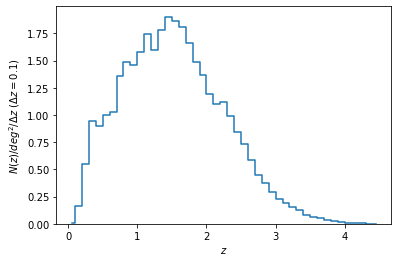

In [17]:
hist, _ = np.histogram(z_spz, bins=z_bins)
hist = hist / area_gaia_Av05.to(u.deg**2).value
dz = 0.1
z_bins = np.arange(0, 4.6, dz)
bin_centers = 0.5*(z_bins[:-1] + z_bins[1:])
plt.step(bin_centers, hist, where='mid')
plt.ylim(0)
plt.xlabel(r'$z$')
plt.ylabel(rf'$N(z) / deg^2 / \Delta z$ $(\Delta z={dz})$')

In [18]:
n_bins = 20
dz = 0.1
z_bins = np.arange(0, 4.6, dz)
ndens_gaia = ndens_of_z(z_spz, z_bins, Planck15)
print(len(ndens_gaia))

45


Text(0, 0.5, '$\\bar{n}(z)$, $(h\\,\\mathrm{Gpc}^{-1})^3$')

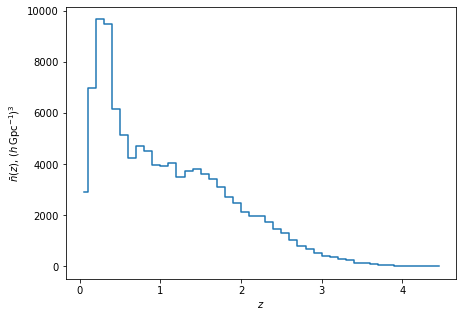

In [19]:
ndens_gaia_val = [(n.to(1/u.Gpc**3)/Planck15.h**3).value for n in ndens_gaia]
zs_avg = 0.5*(z_bins[1:]+z_bins[:-1])
plt.figure(figsize=(7,5))
plt.step(zs_avg, ndens_gaia_val, where='mid')
plt.xlabel(r'$z$')
plt.ylabel(r'$\bar{n}(z)$, $(h\,\mathrm{Gpc}^{-1})^3$')

Text(0, 0.5, '$10^5 \\bar{n}(z)$, $(h\\,\\mathrm{Mpc}^{-1})^3$')

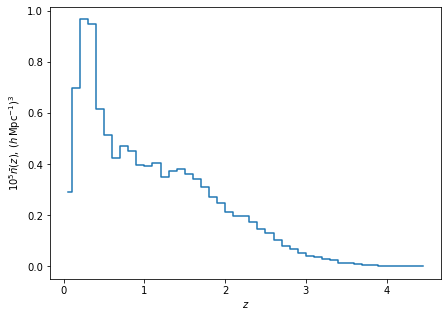

In [20]:
ndens_gaia_val = np.array([(n.to(1/u.Mpc**3)/Planck15.h**3).value for n in ndens_gaia])
dz = 0.1
z_bins = np.arange(0, 4.6, dz)
zs_avg = 0.5*(z_bins[1:]+z_bins[:-1])
plt.figure(figsize=(7,5))
plt.step(zs_avg, 10**5 * ndens_gaia_val, where='mid')
plt.xlabel(r'$z$')
plt.ylabel(r'$10^5 \bar{n}(z)$, $(h\,\mathrm{Mpc}^{-1})^3$')

eboss: ndens 1e-5 to edges, 0.8<z<2.2, 2e-5 at peak
G20.0: ndens 2e-6 up to z=2; 
G20.4: ndens 3.5e-6 up to z=1.7; 3e-6 to z=1.8; 2.5e-6 to z=2 (4e-6 at peak)

In [22]:
z_min, z_max = np.min(z_spz), np.max(z_spz)
P0 = 10**4 * u.Mpc**3 * Planck15.h**3 
volume_effective_Gpcperh(z_spz, z_bins, z_min, z_max, Planck15, area_gaia_Av05, P0)

0.0 0.1 0.05
0.21869307288340017 Gpc
2.8934951742691972e-06 1 / Mpc3
0.4321244883487781 Gpc 0.1 4.321244883487781 Gpc

0.1 0.2 0.15000000000000002
0.6401967688824236 Gpc
6.9899305342282066e-06 1 / Mpc3
0.4107252249396704 Gpc 0.1 4.107252249396704 Gpc

0.2 0.30000000000000004 0.25
1.0400578777456695 Gpc
9.664275270117614e-06 1 / Mpc3
0.38897779920429976 Gpc 0.10000000000000003 3.8897779920429962 Gpc

0.30000000000000004 0.4 0.35000000000000003
1.4181931592244363 Gpc
9.501788791789299e-06 1 / Mpc3
0.367386578112475 Gpc 0.09999999999999998 3.673865781124751 Gpc

0.4 0.5 0.45
1.7749707431322723 Gpc
6.176316008726663e-06 1 / Mpc3
0.3463471714766766 Gpc 0.09999999999999998 3.463471714766767 Gpc

0.5 0.6000000000000001 0.55
2.111098245649437 Gpc
5.142235331439649e-06 1 / Mpc3
0.3261444847113464 Gpc 0.10000000000000009 3.2614448471134607 Gpc

0.6000000000000001 0.7000000000000001 0.6500000000000001
2.4275165669284067 Gpc
4.255125306697295e-06 1 / Mpc3
0.30696410914391503 Gpc 0.0999999999999999

414.9424840557638

In [ ]:
P0 = 10**4 * u.Mpc**3 * Planck15.h**3 
ndens_gaia_Mpcperh = [n.to(1/u.Mpc**3)/Planck15.h**3 for n in ndens_gaia]
ndens_gaia_Mpcperh = np.array([n.value for n in ndens_gaia_Mpcperh])*(1/u.Mpc**3)
print(ndens_gaia_Mpcperh)
print(P0)
nP_ratio = ndens_gaia_Mpcperh * P0 /(1 + ndens_gaia_Mpcperh * P0)

In [ ]:
ndens_gaia_val = [(n.to(1/u.Gpc**3)/Planck15.h**3).value for n in ndens_gaia]
zs_avg = 0.5*(z_bins[1:]+z_bins[:-1])
plt.figure(figsize=(7,5))
plt.step(zs_avg, nP_ratio, where='mid')
plt.xlabel(r'$z$')
plt.ylabel(r'$nP/(1+nP)$')

In [ ]:
v_toz2 = volume_Gpcperh(Planck15, 0.1, 2, area_gaia_Av02)

In [ ]:
def sigP_over_P(V, n, P):
    print(V, n, P)
    return 1/np.sqrt(V) * (1+1/(n*P))

In [ ]:
n = 2e-6 * u.Mpc**(-3) / Planck15.h**3
sigP_over_P(v_toz2, n, P0)

In [ ]:
print(vol_eboss)
n_eboss = 1e-5 * u.Mpc**(-3) / Planck15.h**3
sigP_over_P(vol_eboss, n_eboss, P0)

In [ ]:
# Compared to eboss: factor of 5 worse in number density
# maybe fac of 4 better in volume tho?? 
# eboss 0.11 of the sky, we are near a half, so makes sense w same z-range

### dunno what p0 should. be - looks near 0 at small k??

# SDSS

In [9]:
def ndens_of_z(z_arr, z_bins, area, cosmo):
    
    v_at_z_bins = np.empty(len(z_bins), dtype=u.Quantity)
    for i in range(len(z_bins)):
        v = cosmo.comoving_volume(z_bins[i])
        # TODO: check if this has the correct h factor
        v_at_z_bins[i] = v.to(u.Gpc**3)
    v_at_z_bins *= area/area_allsky
    v_shells = v_at_z_bins[1:] - v_at_z_bins[:-1] 
    ndens = []
    for i in range(len(z_bins)-1):
        N_inbin = np.sum((z_arr >= z_bins[i]) & (z_arr < z_bins[i+1]))
        ndens_inbin = N_inbin/v_shells[i]
        ndens.append(ndens_inbin)
    return ndens

In [14]:
cosmo = Planck18
area_allsky = 41252.96125*(u.deg**2)

In [15]:
tab_sqall = utils.load_table(f'../data/quasars_sdss_xgaiaall_xunwiseall_good.fits')
print(f"Number of all SDSS quasars: {len(tab_sqall)}")

Number of all SDSS quasars: 638083


In [16]:
# area via: # https://academic.oup.com/mnras/article/514/3/3396/6566355?login=true
area_sdss = 4808*(u.deg**2)

In [17]:
z_arr = tab_sqall['z_sdss']
z_min, z_max = np.min(z_arr), np.max(z_arr)
z_bins = np.arange(0, z_max+0.1, 0.1)

In [18]:
ndens_sdss = ndens_of_z(z_arr, z_bins, area_sdss, cosmo)
ndens_sdss_val = np.array([(n.to(1/u.Mpc**3)/cosmo.h**3).value for n in ndens_sdss])

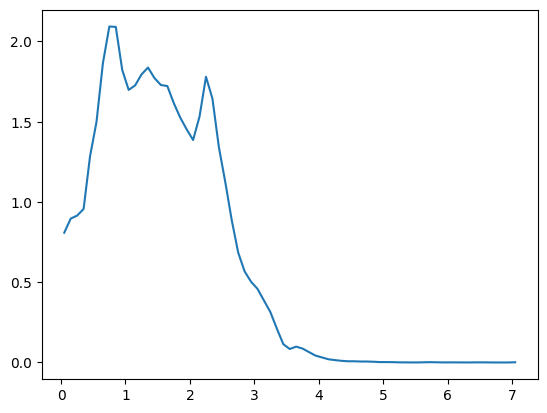

In [19]:
z_bins_avg = 0.5*(z_bins[:-1] + z_bins[1:])
plt.plot(z_bins_avg, ndens_sdss_val*1e5)

In [20]:
Nz, zedge = np.histogram(z_arr, bins=z_bins)
print(Nz)

[   99   704  1762  3216  6366  9877 15296 20355 23271 22615 23006 25118
 27686 29722 29797 29998 30658 29360 28168 27144 26139 29090 33930 31407
 25646 21443 16879 12995 10712  9448  8559  7160  5774  3859  2071  1507
  1757  1523  1128   739   541   341   248   174   125   122    97    94
    73    39    40    33    13     9     5     5    22    27    14     6
     9     7     4     4    10    10     5     1     1     3    17]


In [21]:
def v_shells_of_z(z_arr, z_bins, area, cosmo):
    
    v_at_z_bins = np.empty(len(z_bins), dtype=u.Quantity)
    for i in range(len(z_bins)):
        v = cosmo.comoving_volume(z_bins[i])
        v_at_z_bins[i] = v.to(u.Gpc**3)
    v_at_z_bins *= area/area_allsky
    v_shells = v_at_z_bins[1:] - v_at_z_bins[:-1] 

    return np.array(v_shells)

In [22]:
v_shells = v_shells_of_z(z_arr, z_bins, area_sdss, cosmo)

In [23]:
v_shells_Mpch = [(v.to(u.Mpc**3)*(cosmo.h**3)).value for v in v_shells]

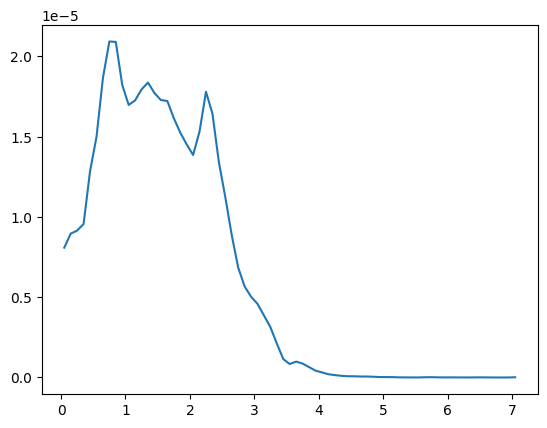

In [24]:
plt.plot(z_bins_avg, Nz/v_shells_Mpch)

In [25]:
# eqn 5 of https://arxiv.org/pdf/1712.08064.pdf
def volume_effective_Gpcperh(z_arr, z_bins, z_min, z_max, cosmo, area, P0):
    
    area_rad = area.to(u.rad**2)
    ndens_at_z_bins = ndens_of_z(z_arr, z_bins, area, cosmo)
    
    R_at_z_bins = np.empty(len(z_bins), dtype=u.Quantity)
    for i in range(len(z_bins)):
        R_at_z_bins[i] = cosmo.comoving_distance(z_bins[i]).to(u.Gpc)
    
    # discrete integral, just summing
    def integrand(ndens, R, dR, dz):
        print('ndens', ndens)
        print('P0', P0)
        print('area_rad', area_rad)
        print('R', R)
        print('dR', dR)
        print('dz', dz)

        #val = (ndens * P0 /(1 + ndens * P0))**2 * area_rad.value * R**2 * dRdz 
        val = ((ndens * P0) /(1 + ndens * P0))**2 * area_rad.value * R**2 * dR * dz
        print('prefac, presq:', (ndens * P0) /(1 + ndens * P0))
        print('val', val.to(u.Gpc**3))
        print()
        return val.to(u.Gpc**3)
        #return area_rad.value * R**2 * dRdz * dz

    integral = 0
    for i in range(len(z_bins)-1):
        z_avg = 0.5*(z_bins[i] + z_bins[i+1])
        print("zavg", z_avg)
        
        R = cosmo.comoving_distance(z_avg).to(u.Gpc)
        dR = R_at_z_bins[i+1] - R_at_z_bins[i]
        dz = z_bins[i+1] - z_bins[i]
        dRdz = dR/dz
        #integral += integrand(ndens_at_z_bins[i], R, dRdz, dz)
        integral += integrand(ndens_at_z_bins[i], R, dR, dz)

    v_Gpc = integral.to(u.Gpc**3)
    v_Gpcperh = v_Gpc * cosmo.h**3
    print(f"Sky area is {area:.3f} which is {area/area_allsky:.3f} of the sky")
    print(f"Effective volume is {v_Gpc:.3f} = {v_Gpcperh.value:.3f} (Gpc/h)^3")
    return v_Gpcperh.value

In [28]:
# z_arr = tab_sqall['z_sdss']
# z_min, z_max = np.min(z_arr), np.max(z_arr)
# z_bins = np.arange(0, z_max+0.1, 0.1)
P0 = 4e4 * u.Mpc**3 * cosmo.h**3 
#P0 = 6000 * u.Mpc**3 * cosmo.h**3 
vol_sdss = volume_effective_Gpcperh(z_arr, z_bins, z_min, z_max, cosmo, area_sdss, P0)
vol_sdss_fmt = rf'{vol_sdss:.2f} $(h^{{-1}}\,Gpc)^3$'
print(vol_sdss)
print(vol_sdss_fmt)

zavg 0.05
ndens 2505.4227913671875 1 / Gpc3
P0 1858.4343785759997 Mpc3
area_rad 1.4646005543344949 rad2
R 0.21893393187129323 Gpc
dR 0.4325656977383524 Gpc
dz 0.1
prefac, presq: 4634584.463712588 Mpc3 / Gpc3
val 6.52257418919311e-08 Gpc3

zavg 0.15000000000000002
ndens 2776.4942039619327 1 / Gpc3
P0 1858.4343785759997 Mpc3
area_rad 1.4646005543344949 rad2
R 0.6407996915429482 Gpc
dR 0.41101220169122066 Gpc
dz 0.1
prefac, presq: 5133444.056860417 Mpc3 / Gpc3
val 6.513826163586842e-07 Gpc3

zavg 0.25
ndens 2835.465209241957 1 / Gpc3
P0 1858.4343785759997 Mpc3
area_rad 1.4646005543344949 rad2
R 1.0408772901667127 Gpc
dR 0.38912876784278017 Gpc
dz 0.10000000000000003
prefac, presq: 5241903.676273435 Mpc3 / Gpc3
val 1.6966398835618083e-06 Gpc3

zavg 0.35000000000000003
ndens 2962.2410824241856 1 / Gpc3
P0 1858.4343785759997 Mpc3
area_rad 1.4646005543344949 rad2
R 1.4191031911040473 Gpc
dR 0.36742208688441136 Gpc
dz 0.09999999999999998
prefac, presq: 5474990.129155567 Mpc3 / Gpc3
val 3.24847

In [64]:
# eqn 1.7.32 of https://arxiv.org/pdf/1606.00180.pdf
def volume_effective_Gpcperh_2(z_arr, z_bins, z_min, z_max, cosmo, area, P0):
    
    area_rad = area.to(u.rad**2)
    ndens_at_z_bins = ndens_of_z(z_arr, z_bins, area, cosmo)
    ndens_at_z_bins = np.array(ndens_at_z_bins, dtype=u.Quantity)
    #print(np.max(ndens_at_z_bins).to(1/u.Mpc**3)/cosmo.h**3)
    #print(P0)
    #print(ndens_at_z_bins)
    nPs = np.array([n*P0 for n in ndens_at_z_bins])
    #print(nPs)
    prefacs = (nPs /(1 + nPs))**2
    v_shells = v_shells_of_z(z_arr, z_bins, area, cosmo)    
    v_Gpc = np.sum(prefacs*v_shells)
#     print(v_shells)
#     print(np.sum(v_shells))
#     print(prefacs)
#     print(v_Gpc)
    v_Gpc = v_Gpc.to(u.Gpc**3) # this should be just in Gpc
    v_Gpcperh = v_Gpc * cosmo.h**3 # (Gpc) -> (Gpc/h)^3, mult by h^3 
    print(f"Sky area is {area:.3f} which is {area/area_allsky:.3f} of the sky")
    print(f"Effective volume is {v_Gpc:.3f} = {v_Gpcperh.value:.3f} (Gpc/h)^3")
    return v_Gpcperh.value

In [65]:
P0 = 4e4 * u.Mpc**3 / cosmo.h**3 #  (Mpc/h)^3 -> (Mpc)^3, mult by 1/h^3 to get in just Mpc^3 units
vol_sdss = volume_effective_Gpcperh_2(z_arr, z_bins, z_min, z_max, cosmo, area_sdss, P0)


Sky area is 4808.000 deg2 which is 0.117 of the sky
Effective volume is 18.456 Gpc3 = 5.717 (Gpc/h)^3


In [71]:
def volume_physical_Gpcperh(cosmo, z_min, z_max, area):
    v_inner = cosmo.comoving_volume(z_min)
    v_outer = cosmo.comoving_volume(z_max)
    v_shell = v_outer - v_inner
    v_shell_Gpc = v_shell.to(u.Gpc**3)
    v_shell_Gpcperh = v_shell_Gpc * cosmo.h**3

    frac_sky = area / area_allsky
    v_Gpc = frac_sky * v_shell_Gpc
    v_Gpcperh = v_Gpc * cosmo.h**3

    print(f"Volume in shell between {z_min} < z < {z_max}: {v_shell_Gpc:.3f} = {v_shell_Gpcperh.value:.3f} (Gpc/h)^3")
    print(f"Sky area is {area:.3f} which is {frac_sky:.3f} of the sky")
    print(f"Volume is then {v_Gpc:.3f} = {v_Gpcperh.value:.3f} (Gpc/h)^3")
    return v_Gpcperh.value

In [73]:
volume_physical_Gpcperh(cosmo, 0.8, 2.2, area_sdss)

Volume in shell between 0.8 < z < 2.2: 632.523 Gpc3 = 195.917 (Gpc/h)^3
Sky area is 4808.000 deg2 which is 0.117 of the sky
Volume is then 73.720 Gpc3 = 22.834 (Gpc/h)^3


22.833988194895603

### number density

In [77]:
G_hi = 20.5
fn_gcathi = f'../data/gaiaQ_G{G_hi}.fits'
tab_gcathi = utils.load_table(fn_gcathi)
print(len(tab_gcathi))

1295502


In [78]:
z_arr_gaia = tab_gcathi['redshift_spz']

In [ ]:
ndens_gaia = ndens_of_z(z_arr, z_bins, area_sdss, cosmo)
ndens_sdss_val = np.array([(n.to(1/u.Mpc**3)/cosmo.h**3).value for n in ndens_sdss])

z_bins_avg = 0.5*(z_bins[:-1] + z_bins[1:])
plt.plot(z_bins_avg, ndens_sdss_val*1e5)